#IA MAXIMIZING REVENUES
# THOMPSON SAMPLING
"""
Created on Wed Mar 13 12:29:25 2019

@author: Sebastian Vallejo
"""

In [1]:
# IMPORT THE LUBRARIES
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# SETTING THE PARAMETERS
N = 10000
d = 9
revenue = 100

In [3]:
# CREATE THE SIMULATION
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

<function matplotlib.pyplot.show(*args, **kw)>

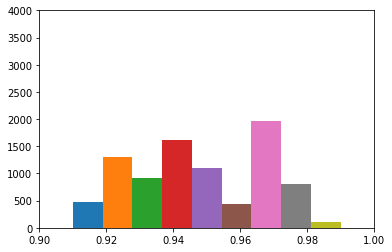

In [4]:
#visualizing the results
plt.hist(X)
plt.xlim([0.9,1])
plt.ylim([0,4000])
plt.show

In [5]:
#Implementing a Random Strategy and Thompson Sampling
strategies_selected_rs = [] 
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = list(np.zeros(d))
numbers_of_rewards_0 = [0] * 9

for n in range(0, N):
    # Random strategy
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    total_reward_rs += X[n,strategy_rs]
    
    # Thompson Sampling
    max_random = 0
    strategies_ts = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategies_ts = i
    reward_ts = X[n, strategies_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategies_ts] +=1
    else:
        numbers_of_rewards_0[strategies_ts] +=1
    strategies_selected_ts.append(strategies_ts)
    total_reward_ts += reward_ts

In [6]:
#Computing the absolute and relative returns
absolute_return = (total_reward_ts - total_reward_rs) * revenue
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100

print("Revenue obtain: ${:.0f}".format(absolute_return))
print("Relative return: {:.0f}%".format(relative_return))

Revenue obtain: $93700
Relative return: 100%


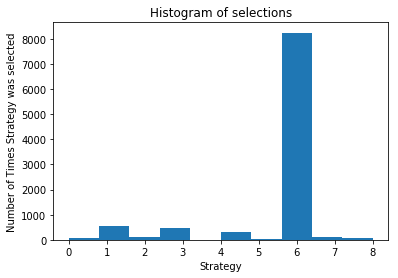

In [7]:
#Plotting the histogram
plt.hist(strategies_selected_ts)
plt.title('Histogram of selections')
plt.xlabel('Strategy')
plt.ylabel('Number of Times Strategy was selected')
plt.show()